<a href="https://colab.research.google.com/github/Bikash432/Bikash-Thapa-Magar/blob/master/movie_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import plotly.graph_objects as go # Plotly graph objects
import warnings # handle warning messages
warnings.filterwarnings('ignore') # Ignore warning messages

In [ ]:
df = pd.read_csv("/content/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataset contains 8807 rows and 12 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

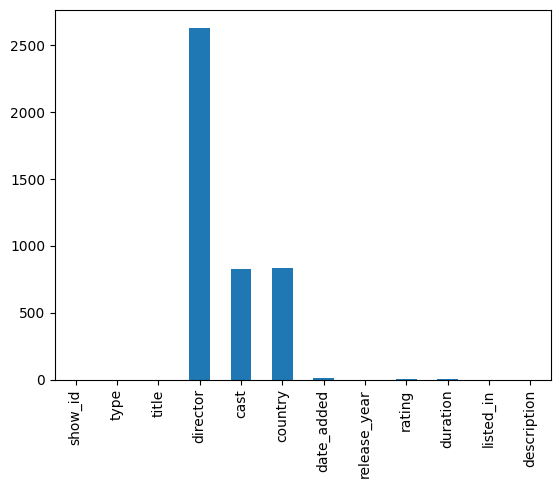

In [ ]:
df.isnull().sum().plot(kind='bar')

In [ ]:
# Remove missing values from the DataFrame
netflix=df.dropna()

# After removing missing values, check the data shape
print(f'The dataset contains {netflix.shape[0]} rows and {netflix.shape[1]} columns')

The dataset contains 5332 rows and 12 columns


In [ ]:
# Checking the duplicate values in the data
duplicate_values=df.duplicated().sum()
print(f'The data contains {duplicate_values} duplicate values')

The data contains 0 duplicate values


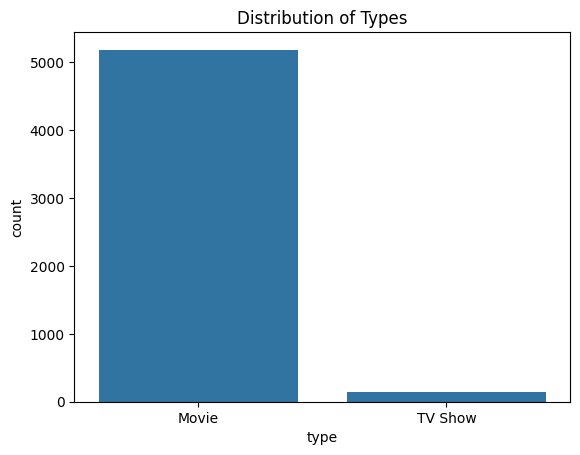

In [ ]:
# Create a count plot for the 'type' column
sns.countplot(data=netflix, x='type')

# Set the title of the plot
plt.title('Distribution of Types')

# Display the plot
plt.show()

In [ ]:
# Select rows where 'type' is 'Movie'
movie = netflix[netflix['type'] == 'Movie']

In [ ]:
# Remove 'min' suffix from values in the 'duration' column and convert to integers
movie['duration'] = movie['duration'].str.replace(' min', '').astype(int)

In [ ]:
# check data types of movie duration
print(movie['duration'].dtype)

int64


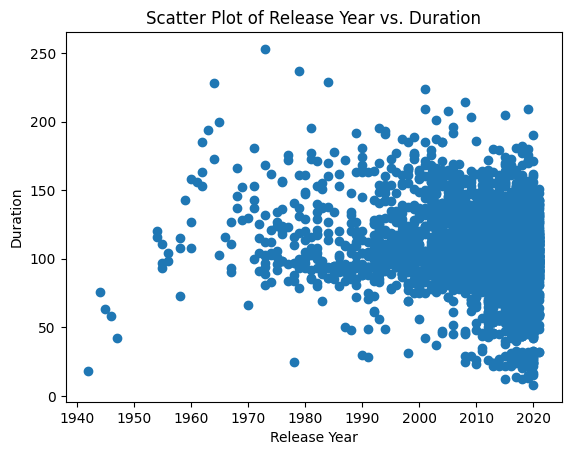

In [ ]:
# Create a scatter plot of 'release_year' versus 'duration'
plt.scatter(movie['release_year'], movie['duration'])

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.title('Scatter Plot of Release Year vs. Duration')

# Display the plot
plt.show()

In [17]:
# Find the index of the row with the minimum duration
min_duration_index = movie['duration'].idxmin()

# Get the corresponding release year and duration
corresponding_min_release_year = movie.loc[min_duration_index, 'release_year']
min_duration = movie.loc[min_duration_index, 'duration']

print(f"The movie with the minimum duration of {min_duration} minutes was released in the year {corresponding_min_release_year}.")

# Find the index of the row with the maximum duration
max_duration_index = movie['duration'].idxmax()

# Get the corresponding release year and duration
corresponding_max_release_year = movie.loc[max_duration_index, 'release_year']
max_duration = movie.loc[max_duration_index, 'duration']

print(f"The movie with the maximum duration of {max_duration} minutes was released in the year {corresponding_max_release_year}.")

The movie with the minimum duration of 8 minutes was released in the year 2020.
The movie with the maximum duration of 253 minutes was released in the year 1973.


In [18]:
# Count the occurrences of each unique entry in the 'listed_in' column
genre_counts = movie['listed_in'].value_counts()

# Display the genre counts
print("Genre Counts:")
print(genre_counts)

Genre Counts:
Dramas, International Movies                                        336
Stand-Up Comedy                                                     286
Comedies, Dramas, International Movies                              257
Dramas, Independent Movies, International Movies                    243
Children & Family Movies, Comedies                                  179
                                                                   ... 
Action & Adventure, Children & Family Movies, Independent Movies      1
LGBTQ Movies, Thrillers                                               1
Sci-Fi & Fantasy                                                      1
Children & Family Movies, Comedies, Cult Movies                       1
Cult Movies, Dramas, Thrillers                                        1
Name: listed_in, Length: 268, dtype: int64


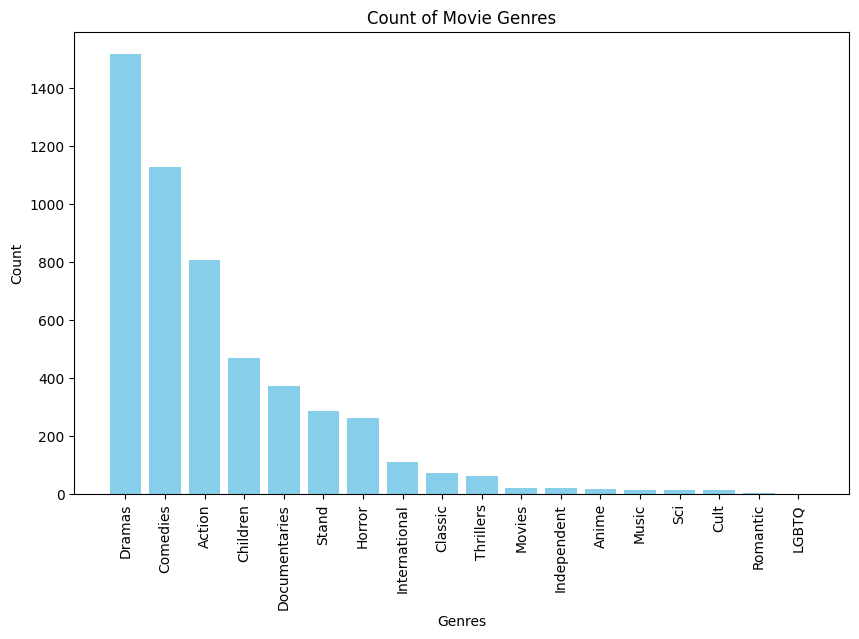

In [19]:
# Extract genres from the 'listed_in' column
movie['genres'] = movie['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)

# Count the occurrences of each genre
genre_counts_movie = movie['genres'].value_counts().reset_index()

# Rename the columns to 'genre' and 'count'
genre_counts_movie.columns = ['genre', 'count']

# Create a bar plot of genre counts
plt.figure(figsize=(10, 6))
plt.bar(genre_counts_movie['genre'], genre_counts_movie['count'], color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Count of Movie Genres')
plt.xticks(rotation=90)
plt.show()

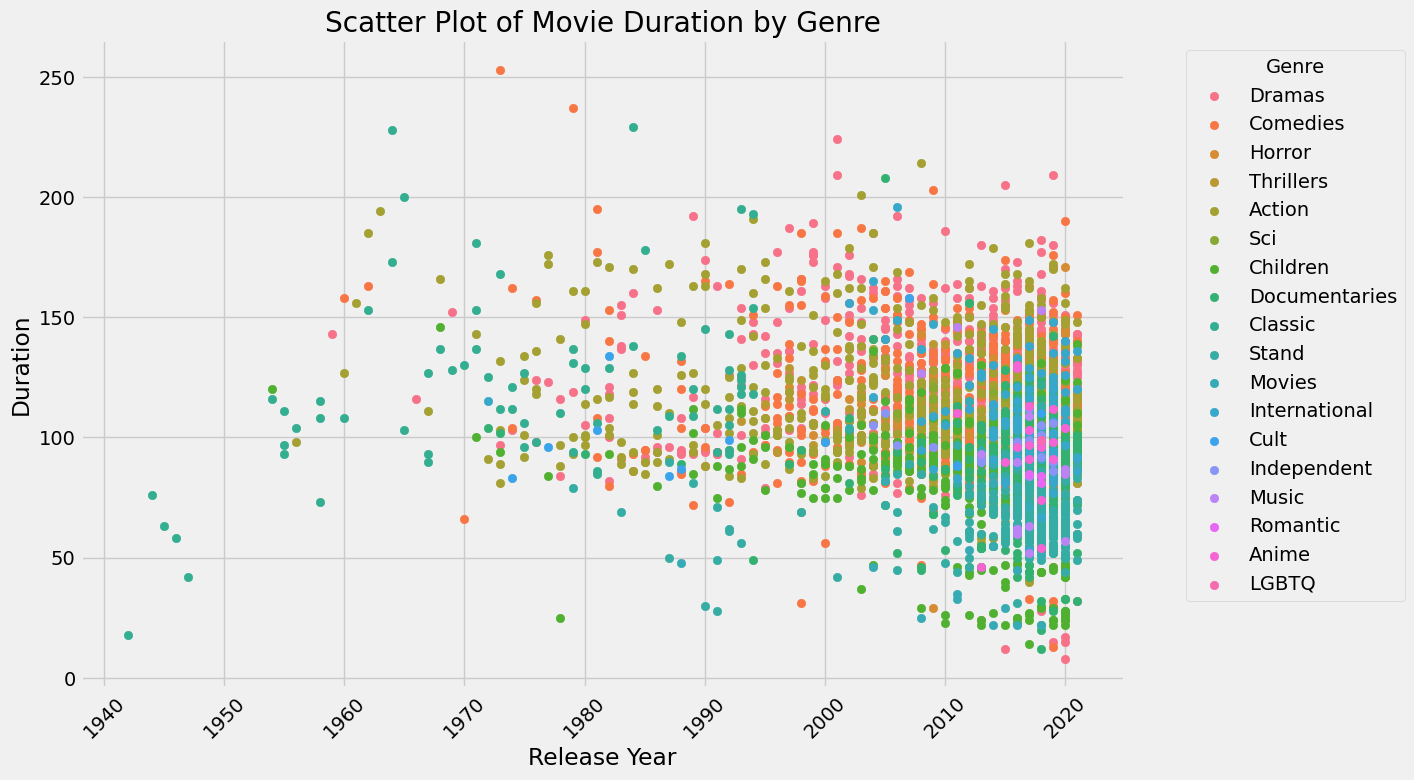

In [20]:
# Apply the 'fivethirtyeight' style
plt.style.use('fivethirtyeight')

# Create a color palette for each unique genre
palette = sns.color_palette("husl", len(movie['genres'].unique()))

# Create scatter plot with different colors for each genre
plt.figure(figsize=(12, 8))  # Increase the figure size here
for i, genre in enumerate(movie['genres'].unique()):
    plt.scatter(movie['release_year'][movie['genres'] == genre],
                movie['duration'][movie['genres'] == genre],
                label=genre,
                color=palette[i])

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.title('Scatter Plot of Movie Duration by Genre')
plt.xticks(rotation=45)

# Position the legend outside the plot area
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()


In [21]:
# Change the x data to movie['duration']
trace = go.Histogram(
    x=movie['duration'],  # Use movie duration for x-axis
    xbins=dict(size=0.5),
    marker=dict(color='rgb(26, 118, 255)')
)

layout = go.Layout(
    template="plotly_dark",  # Dark theme layout
    title='Distribution of Movie Durations',  # Title of the plot
    xaxis=dict(title='Duration (Minutes)')  # X-axis label
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [22]:
movie['rating'].value_counts()

TV-MA       1741
TV-14       1177
R            778
PG-13        470
TV-PG        416
PG           275
TV-G          81
TV-Y          71
TV-Y7         70
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
Name: rating, dtype: int64

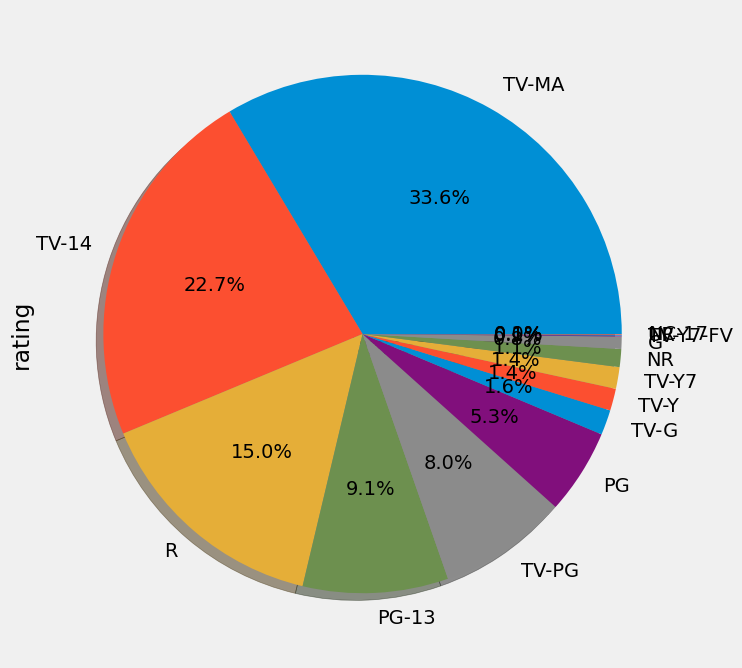

In [23]:
# Plot a pie chart to visualize the distribution of movie ratings
movie['rating'].value_counts().plot.pie(
    autopct='%1.1f%%',  # Add percentage labels to each wedge
    shadow=True,  # Add shadow effect to the pie chart
    figsize=(10, 8)  # Set the size of the figure
)

# Display the pie chart
plt.show()

In [26]:
movie.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
genres          0
dtype: int64

In [28]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [29]:
df = df[['show_id','title','description','listed_in']]

In [30]:
df

,show_id,title,description,listed_in
0,s1,Dick Johnson Is Dead,"As her father nears the end of his life, filmm...",Documentaries
1,s2,Blood & Water,"After crossing paths at a party, a Cape Town t...","International TV Shows, TV Dramas, TV Mysteries"
2,s3,Ganglands,To protect his family from a powerful drug lor...,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo...","Docuseries, Reality TV"
4,s5,Kota Factory,In a city of coaching centers known to train I...,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...
8802,s8803,Zodiac,"A political cartoonist, a crime reporter and a...","Cult Movies, Dramas, Thrillers"
8803,s8804,Zombie Dumb,"While living alone in a spooky town, a young g...","Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Zombieland,Looking to survive in a world taken over by zo...,"Comedies, Horror Movies"
8805,s8806,Zoom,"Dragged from civilian life, a former superhero...","Children & Family Movies, Comedies"


In [34]:
df['tags']=df['description']+df['listed_in']

In [35]:
df

,show_id,title,description,listed_in,tags
0,s1,Dick Johnson Is Dead,"As her father nears the end of his life, filmm...",Documentaries,"As her father nears the end of his life, filmm..."
1,s2,Blood & Water,"After crossing paths at a party, a Cape Town t...","International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,Ganglands,To protect his family from a powerful drug lor...,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo...","Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,Kota Factory,In a city of coaching centers known to train I...,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...
8802,s8803,Zodiac,"A political cartoonist, a crime reporter and a...","Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,Zombie Dumb,"While living alone in a spooky town, a young g...","Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Zombieland,Looking to survive in a world taken over by zo...,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Zoom,"Dragged from civilian life, a former superhero...","Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Feture Selection


In [36]:
new_data = df.drop(columns=['description','listed_in'])


In [37]:
new_data

,show_id,title,tags
0,s1,Dick Johnson Is Dead,"As her father nears the end of his life, filmm..."
1,s2,Blood & Water,"After crossing paths at a party, a Cape Town t..."
2,s3,Ganglands,To protect his family from a powerful drug lor...
3,s4,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo..."
4,s5,Kota Factory,In a city of coaching centers known to train I...
...,...,...,...
8802,s8803,Zodiac,"A political cartoonist, a crime reporter and a..."
8803,s8804,Zombie Dumb,"While living alone in a spooky town, a young g..."
8804,s8805,Zombieland,Looking to survive in a world taken over by zo...
8805,s8806,Zoom,"Dragged from civilian life, a former superhero..."


In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
cv =CountVectorizer(max_features=10000, stop_words='english')

In [43]:
cv


CountVectorizer(max_features=10000, stop_words='english')

In [45]:
vector = cv.fit_transform(new_data['tags'].values.astype('U')).toarray()

In [46]:
vector.shape

(8807, 10000)

In [51]:
from sklearn.metrics.pairwise import cosine_similarity

In [53]:
similarity = cosine_similarity(vector)

In [54]:
similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.06085806,
        0.        ],
       [0.        , 1.        , 0.39477102, ..., 0.        , 0.        ,
        0.08451543],
       [0.        , 0.39477102, 1.        , ..., 0.        , 0.0410305 ,
        0.07784989],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.12171612,
        0.05773503],
       [0.06085806, 0.        , 0.0410305 , ..., 0.12171612, 1.        ,
        0.10540926],
       [0.        , 0.08451543, 0.07784989, ..., 0.05773503, 0.10540926,
        1.        ]])

In [58]:
new_data

,show_id,title,tags
0,s1,Dick Johnson Is Dead,"As her father nears the end of his life, filmm..."
1,s2,Blood & Water,"After crossing paths at a party, a Cape Town t..."
2,s3,Ganglands,To protect his family from a powerful drug lor...
3,s4,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo..."
4,s5,Kota Factory,In a city of coaching centers known to train I...
...,...,...,...
8802,s8803,Zodiac,"A political cartoonist, a crime reporter and a..."
8803,s8804,Zombie Dumb,"While living alone in a spooky town, a young g..."
8804,s8805,Zombieland,Looking to survive in a world taken over by zo...
8805,s8806,Zoom,"Dragged from civilian life, a former superhero..."


In [63]:
new_data[new_data['title']=="Zoom"].index[0]

8805

In [65]:
list(enumerate(similarity[2]))

[(0, 0.0),
 (1, 0.39477101697586137),
 (2, 1.0000000000000002),
 (3, 0.11396057645963795),
 (4, 0.4377137796365057),
 (5, 0.29092868272585615),
 (6, 0.04351941398892446),
 (7, 0.03892494720807615),
 (8, 0.29690784761008215),
 (9, 0.0),
 (10, 0.46193488543715605),
 (11, 0.5402954672391689),
 (12, 0.0930484210398471),
 (13, 0.04351941398892446),
 (14, 0.40201512610368484),
 (15, 0.23354968324845687),
 (16, 0.04222003309207491),
 (17, 0.4689790496105418),
 (18, 0.04222003309207491),
 (19, 0.48484848484848486),
 (20, 0.4177863742936748),
 (21, 0.4449492083146097),
 (22, 0.04222003309207491),
 (23, 0.07987230638308718),
 (24, 0.03629770043203139),
 (25, 0.3503245248726853),
 (26, 0.03798685881987932),
 (27, 0.0),
 (28, 0.08206099398622184),
 (29, 0.0),
 (30, 0.03798685881987932),
 (31, 0.13957263155977062),
 (32, 0.4377137796365057),
 (33, 0.4131671220064233),
 (34, 0.19312181983410703),
 (35, 0.04494665749754947),
 (36, 0.1484539238050411),
 (37, 0.2396169191492615),
 (38, 0.07987230638308

In [68]:
sorted(list(enumerate(similarity[2])), reverse = True , key = lambda vector:vector[1])

[(2, 1.0000000000000002),
 (3976, 0.6365239496641677),
 (734, 0.6141827746434741),
 (7463, 0.597081434026532),
 (6741, 0.5846845821518305),
 (543, 0.5818573654517123),
 (5305, 0.5803704306990811),
 (4366, 0.5757575757575757),
 (3552, 0.5723638070321424),
 (2599, 0.5720775535473555),
 (3789, 0.5685352436149612),
 (3177, 0.5640760748177662),
 (4994, 0.5627748595326503),
 (5194, 0.5627748595326503),
 (6652, 0.5590653920196748),
 (1201, 0.5570484990582332),
 (8165, 0.5570484990582331),
 (3212, 0.5539117094069972),
 (2894, 0.5512459105263766),
 (3034, 0.5512459105263766),
 (1268, 0.5512459105263765),
 (1349, 0.5512459105263765),
 (2976, 0.5512459105263765),
 (3748, 0.5512459105263765),
 (5278, 0.5512459105263765),
 (3445, 0.5462309935991352),
 (3587, 0.5462309935991352),
 (4251, 0.5462309935991352),
 (1991, 0.5454545454545454),
 (2184, 0.5454545454545454),
 (11, 0.5402954672391689),
 (275, 0.5402954672391689),
 (1321, 0.5402954672391689),
 (3414, 0.5402954672391689),
 (4643, 0.5402954672391